In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from typing import Tuple, Dict

import os
import ast
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from thor_magni_tools.utils.load import load_csv_metadata, preprocessing_header
from thor_magni_tools.preprocessing.filtering import Filterer3DOF, Filterer6DOF

In [2]:
DIR_PATH = "../datasets/thor_magni_zenodo/"
SCENARIO_ID = "Scenario_1"

In [3]:
files_list = os.listdir(os.path.join(DIR_PATH, SCENARIO_ID))
files_list

['THOR-Magni_180522_SC1B_R2.csv',
 'THOR-Magni_130522_SC1A_R1.csv',
 'THOR-Magni_120522_SC1B_R2.csv',
 'THOR-Magni_130522_SC1B_R1.csv',
 'THOR-Magni_180522_SC1B_R1.csv',
 'THOR-Magni_170522_SC1B_R2.csv',
 'THOR-Magni_130522_SC1A_R2.csv',
 'THOR-Magni_130522_SC1B_R2.csv',
 'THOR-Magni_180522_SC1A_R1.csv',
 'THOR-Magni_170522_SC1B_R1.csv',
 'THOR-Magni_120522_SC1A_R1.csv',
 'THOR-Magni_120522_SC1B_R1.csv',
 'THOR-Magni_180522_SC1A_R2.csv',
 'THOR-Magni_170522_SC1A_R1.csv',
 'THOR-Magni_170522_SC1A_R2.csv',
 'THOR-Magni_120522_SC1A_R2.csv']

In [4]:
raw_df, header_dict = load_csv_metadata(
    os.path.join(DIR_PATH, SCENARIO_ID, "THOR-Magni_120522_SC1B_R1.csv")
)

/home/tmr/Documents/PhD/My_PhD/code/thor-magni-tools/thor_magni_tools/utils/load.py:22: DtypeWarning: Columns (231,232,233,239,240,241) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(


In [5]:
new_header_dict = preprocessing_header(header_dict)

In [6]:
traj_metadata = new_header_dict["SENSOR_DATA"]["TRAJECTORIES"]["METADATA"]

In [7]:
target_agents = tuple(
    body_name
    for body_name, meta_data in traj_metadata.items()
    if len(meta_data["MARKERS_NAMES"]) > 0
)
target_agents_with_markers = tuple(
    body_name + " - " + marker_name
    for body_name in target_agents
    for marker_name in traj_metadata[body_name]["MARKERS_NAMES"]
)

In [8]:
df = raw_df.dropna(axis=1, how="all")

In [9]:
target_agents

('Helmet_6',
 'Helmet_4',
 'Helmet_5',
 'Helmet_1',
 'Helmet_7',
 'Helmet_2',
 'Helmet_8',
 'Helmet_10',
 'Helmet_3',
 'DARKO_Robot')

# Preprocessing

In [10]:
PREPROCESSING_TYPE = "3D"

In [11]:
columns_suff = ("X", "Y", "Z")
if PREPROCESSING_TYPE == "6D":
    columns_axis = tuple(f"Centroid_{axis}" for axis in columns_suff)
    columns_rot = tuple(f"R{rot}" for rot in range(9))
    columns_suff = columns_axis + columns_rot
columns_suff

('X', 'Y', 'Z')

In [12]:
filtered_columns = [
    col
    for col in df.columns
    if (
        col.startswith(target_agents)
        and col.endswith(columns_suff)
    )
]

In [13]:
target_data = df[["Frame"] + filtered_columns]
target_data

,Frame,DARKO_Robot - 1 X,DARKO_Robot - 1 Y,DARKO_Robot - 1 Z,DARKO_Robot - 2 X,DARKO_Robot - 2 Y,DARKO_Robot - 2 Z,DARKO_Robot - 3 X,DARKO_Robot - 3 Y,DARKO_Robot - 3 Z,...,Helmet_8 - 3 Z,Helmet_8 - 4 X,Helmet_8 - 4 Y,Helmet_8 - 4 Z,Helmet_8 - 5 X,Helmet_8 - 5 Y,Helmet_8 - 5 Z,Helmet_8 Centroid_X,Helmet_8 Centroid_Y,Helmet_8 Centroid_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.01,2,-4234.196,-779.604,692.075,-4006.843,-1284.119,691.486,-4989.450,-1034.982,299.463,...,1984.130,-479.585,-3379.479,1898.451,-562.359,-3484.592,1891.957,-551.26954,-3414.33914,1918.24417
0.02,3,-4234.260,-779.616,692.084,-4006.844,-1284.065,691.444,-4989.459,-1034.986,299.509,...,1983.129,-478.842,-3378.809,1898.466,-561.157,-3484.245,1891.989,-551.51016,-3414.27644,1917.63683
0.03,4,-4234.202,-779.574,692.078,-4002.962,-1284.731,693.225,-4989.447,-1034.985,299.474,...,1982.993,-476.530,-3379.204,1898.408,-559.976,-3483.848,1892.027,-550.30319,-3414.09001,1917.53441
0.04,5,-4234.223,-779.658,692.072,-4002.778,-1284.900,693.384,-4989.461,-1034.971,299.510,...,1983.028,-475.420,-3379.014,1898.321,-558.681,-3483.438,1892.148,-549.21137,-3413.90138,1917.55683
0.05,6,-4234.301,-779.719,692.071,-4002.967,-1285.126,693.366,-4989.850,-1035.042,299.012,...,1982.754,-474.966,-3378.012,1898.279,-557.289,-3483.090,1891.887,-548.41404,-3413.26950,1917.40821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249.96,24997,-4232.016,-779.700,693.047,-4003.213,-1285.192,693.203,-4990.252,-1035.007,298.976,...,1970.523,2634.253,1147.041,1881.396,2511.841,1184.578,1912.175,2582.80742,1202.43320,1916.43978
249.97,24998,-4232.011,-779.687,693.018,-4003.237,-1285.204,693.222,-4990.235,-1034.996,298.965,...,1970.367,2636.744,1146.785,1881.338,2514.529,1184.688,1911.994,2585.45828,1202.35859,1916.27242
249.98,24999,-4231.976,-779.707,693.061,-4003.236,-1285.206,693.184,-4990.267,-1034.998,299.023,...,1970.228,2639.324,1146.402,1881.223,2517.090,1184.691,1911.849,2588.14367,1202.19250,1916.12669


In [14]:
roles = {k: metadata["ROLE"] for k, metadata in traj_metadata.items()}
if PREPROCESSING_TYPE == "6D":
    nans_counter = {
        body_name: target_data[body_name + " Centroid_X"].isna().sum()
        for body_name in target_agents
    }
    new_df = Filterer6DOF.reorganize_df(target_data, target_agents, roles)
elif PREPROCESSING_TYPE == "3D":
    new_df = Filterer3DOF.filter_best_markers(target_data, roles)

In [15]:
new_df

,frame_id,ag_id,x,y,z,data_label,marker_id
Time,,,,,,,
0.01,2,Helmet_4,-713.404,2489.321,1918.689,Visitors-Group 2,4
0.01,2,Helmet_5,-7608.103,-2361.336,1697.668,Visitors-Group 3,3
0.01,2,Helmet_7,-562.624,3118.997,1924.907,Visitors-Group 2,5
0.01,2,Helmet_2,NaN,NaN,NaN,Visitors-Group 3,3
0.01,2,Helmet_3,NaN,NaN,NaN,Visitors-Alone,4
...,...,...,...,...,...,...,...
250.00,25001,Helmet_1,-520.188,-226.954,1947.408,Visitors-Alone,1
250.00,25001,Helmet_8,2640.480,1182.684,1969.926,Visitors-Alone,3
250.00,25001,Helmet_4,8208.766,-392.915,1944.689,Visitors-Group 2,4


# Reprocessing

In [16]:
def interpolate_with_rule(
    input_df: pd.DataFrame, column_name: str, max_consecutive_nans: int
):
    """interpolate given a max number of consecutive nans"""
    mask = input_df[column_name].isna()
    groups = mask.ne(mask.shift()).cumsum()

    interpolated_column = input_df[column_name].interpolate(method="linear")

    interpolated_column = interpolated_column.where(
        groups.groupby(groups).transform("size") <= max_consecutive_nans,
        input_df[column_name],
    )

    input_df[column_name] = interpolated_column
    return input_df

In [17]:
MAX_NANS_TO_INTERPOLATE = 100

In [18]:
faulty_columns = new_df.columns[new_df.columns.str.startswith(("x", "y", "z", "rot"))]
faulty_columns

Index(['x', 'y', 'z'], dtype='object')

In [19]:
agents_in_scenario = new_df["ag_id"].unique()
agents_preprocessed = []
for agent_id in agents_in_scenario:
    target_agent = new_df[new_df["ag_id"] == agent_id]
    target_agent_rule_int = target_agent.copy()
    for col_name in faulty_columns:
        target_agent_rule_int = interpolate_with_rule(
                        target_agent_rule_int, col_name, MAX_NANS_TO_INTERPOLATE
                    )
    agents_preprocessed.append(target_agent_rule_int)
preprocessed_df = pd.concat(agents_preprocessed, axis=0).sort_index()
    

In [20]:
preprocessed_df

,frame_id,ag_id,x,y,z,data_label,marker_id
Time,,,,,,,
0.01,2,Helmet_4,-713.404,2489.321,1918.689,Visitors-Group 2,4
0.01,2,DARKO_Robot,-4234.196,-779.604,692.075,Obstacle,1
0.01,2,Helmet_3,NaN,NaN,NaN,Visitors-Alone,4
0.01,2,Helmet_6,NaN,NaN,NaN,Visitors-Alone,1
0.01,2,Helmet_2,NaN,NaN,NaN,Visitors-Group 3,3
...,...,...,...,...,...,...,...
250.00,25001,Helmet_7,5510.222,537.485,1986.522,Visitors-Group 2,5
250.00,25001,Helmet_5,444.915,2317.454,1698.707,Visitors-Group 3,3
250.00,25001,Helmet_4,8208.766,-392.915,1944.689,Visitors-Group 2,4


In [21]:
if PREPROCESSING_TYPE == "6D":
    postprocessed_nans_counter = {
        body_name: preprocessed_df[preprocessed_df["ag_id"] == body_name]["x_centroid"]
        .isna()
        .sum()
        for body_name in target_agents
    }
elif PREPROCESSING_TYPE == "3D":
    nans_counter = {
        body_name: new_df[new_df["ag_id"] == body_name]["x"]
        .isna()
        .sum()
        for body_name in target_agents
    }
    postprocessed_nans_counter = {
        body_name: preprocessed_df[preprocessed_df["ag_id"] == body_name]["x"]
        .isna()
        .sum()
        for body_name in target_agents
    }

In [22]:
nans_counter

{'Helmet_6': 4780,
 'Helmet_4': 1940,
 'Helmet_5': 4821,
 'Helmet_1': 2551,
 'Helmet_7': 2997,
 'Helmet_2': 4720,
 'Helmet_8': 3892,
 'Helmet_10': 2971,
 'Helmet_3': 4363,
 'DARKO_Robot': 0}

In [23]:
postprocessed_nans_counter

{'Helmet_6': 4493,
 'Helmet_4': 1659,
 'Helmet_5': 4118,
 'Helmet_1': 2311,
 'Helmet_7': 1935,
 'Helmet_2': 4135,
 'Helmet_8': 3459,
 'Helmet_10': 2590,
 'Helmet_3': 4045,
 'DARKO_Robot': 0}

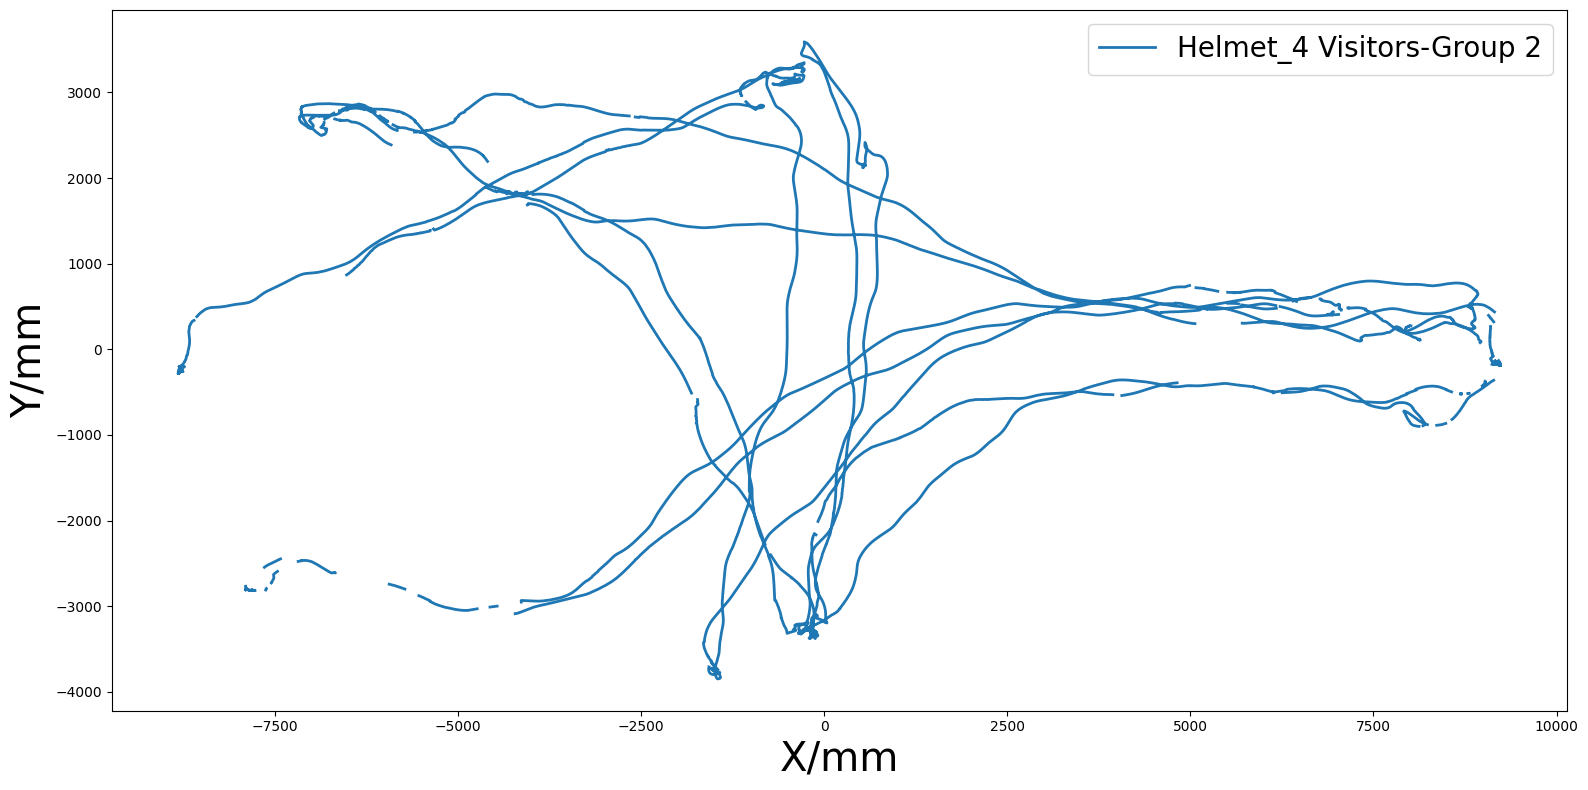

In [29]:
fig

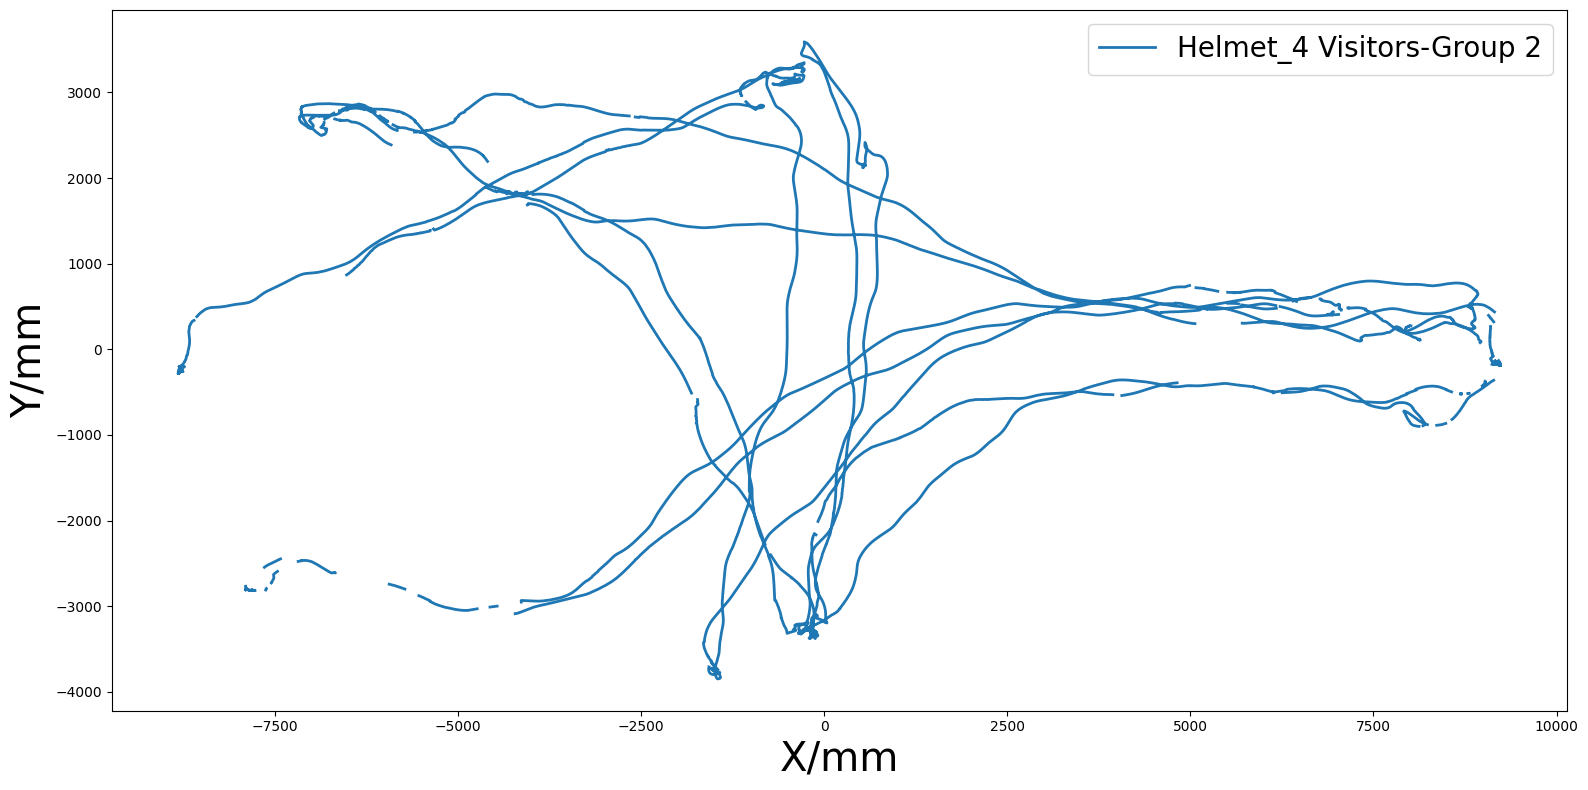

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylabel("Y/mm", fontsize=29)
ax.set_xlabel("X/mm", fontsize=29)
traj_data = new_df[new_df["ag_id"] == "Helmet_7"]
ax.plot(
    traj_data["x"],
    traj_data["y"],
    label=new_df["ag_id"].iloc[0] + f" {new_df['data_label'].iloc[0]}",
    linewidth=2,
)
ax.legend(fontsize="20")
fig.savefig("raw_data.svg")
plt.tight_layout()

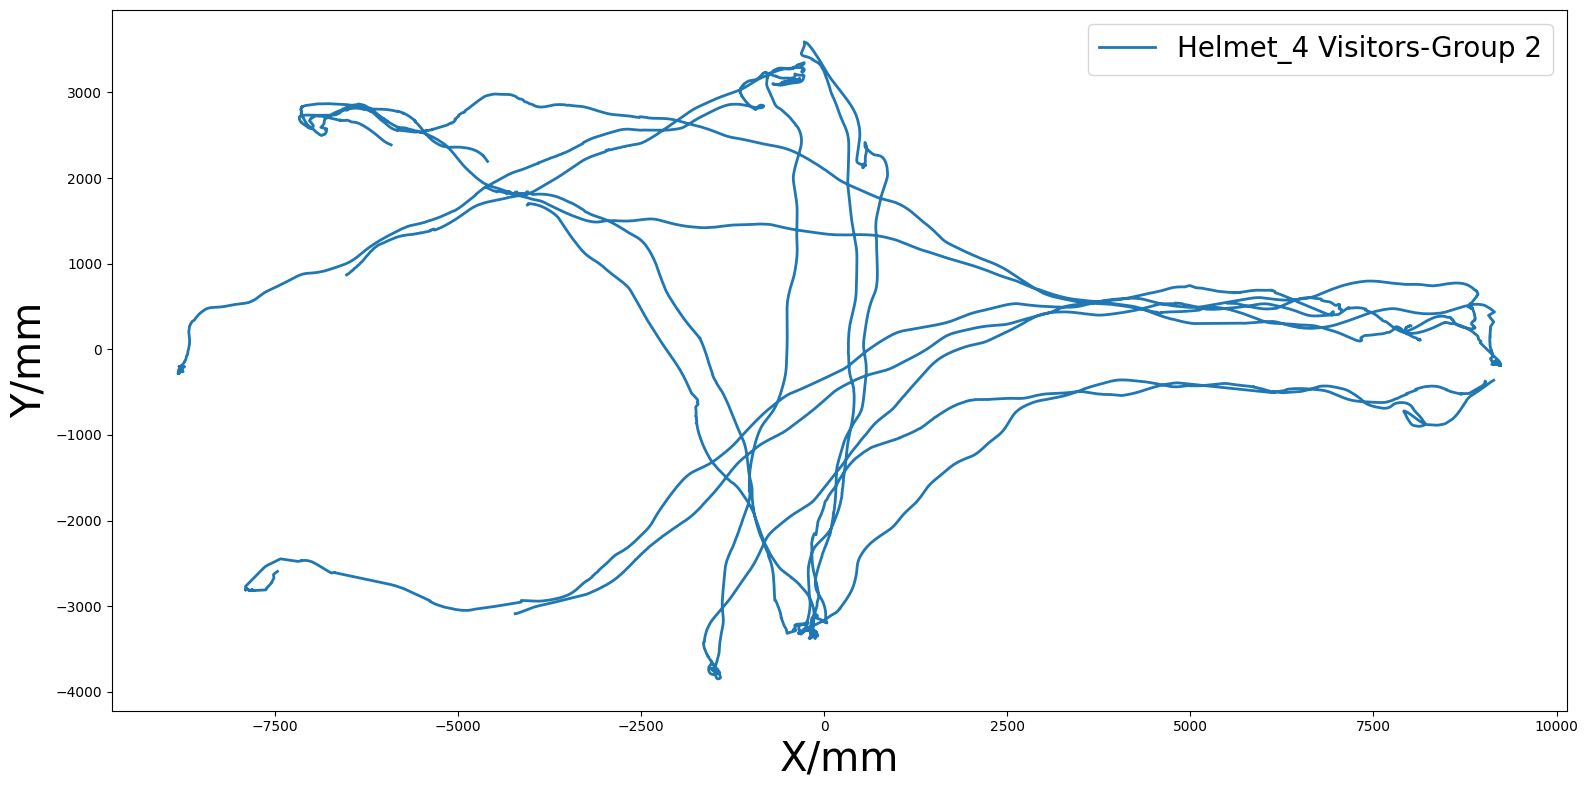

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylabel("Y/mm", fontsize=29)
ax.set_xlabel("X/mm", fontsize=29)
traj_data = preprocessed_df[preprocessed_df["ag_id"] == "Helmet_7"]
ax.plot(
    traj_data["x"],
    traj_data["y"],
    label=preprocessed_df["ag_id"].iloc[0]
    + f" {preprocessed_df['data_label'].iloc[0]}",
    linewidth=2,
)
ax.legend(fontsize="20")
plt.tight_layout()
plt.savefig("pp_data.svg")